#1.Customers.csv
###○ CustomerID: Unique identifier for each customer.
###○ CustomerName: Name of the customer.
###○ Region: Continent where the customer resides.
###○ SignupDate: Date when the customer signed up.

In [ ]:
import pandas as pd
customers=pd.read_csv('/content/Customers.csv')
products=pd.read_csv('/content/Products.csv')
df3=pd.read_csv('/content/Transactions.csv')



In [ ]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
df2.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
df3.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
# For df1
missing_data_df1 = df1.isna().sum()
print(missing_data_df1)

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


No Missing Values: This output signifies that there are no missing values in any of the columns of your df1 DataFrame.

In [ ]:
missing_data_df2 = df2.isna().sum()
print(missing_data_df2)

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


No Missing Values: This output signifies that there are no missing values in any of the columns of your df2 DataFrame.

In [ ]:
missing_data_df3 = df3.isna().sum()
print(missing_data_df3)

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
duplicate_rows_df1 = df1.duplicated().sum()
print(duplicate_rows_df1)

0


In [ ]:
duplicate_rows_df2 = df2.duplicated().sum()
print(duplicate_rows_df2)

0


In [ ]:
duplicate_rows_df3 = df3.duplicated().sum()
print(duplicate_rows_df3)

0


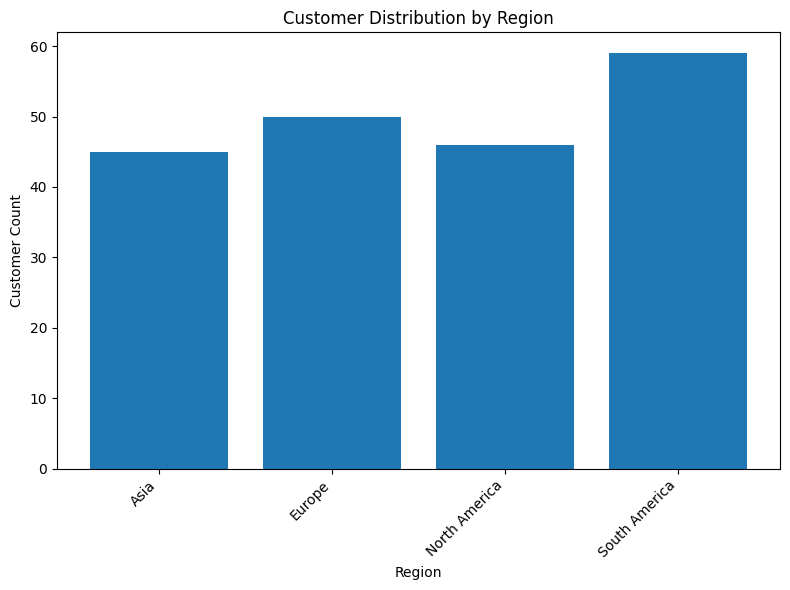

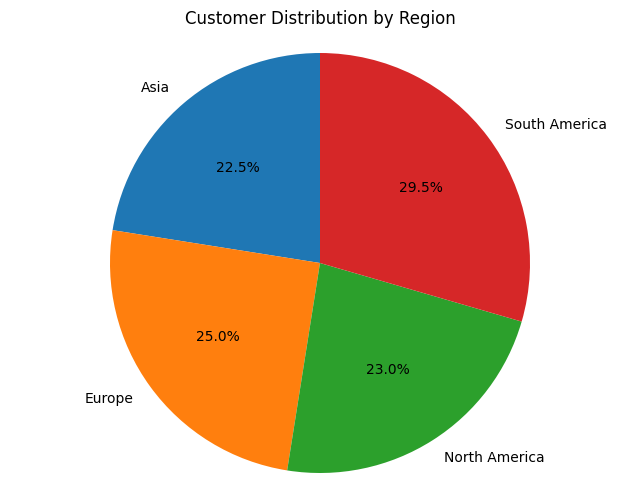

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

customer_distribution = df1.groupby('Region')['CustomerID'].count().reset_index()


customer_distribution.columns = ['Region', 'CustomerCount']

plt.figure(figsize=(8, 6))
plt.bar(customer_distribution['Region'], customer_distribution['CustomerCount'])
plt.xlabel("Region")
plt.ylabel("Customer Count")
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



No Duplicate Rows: This output signifies that there are no duplicate rows in the DataFrames

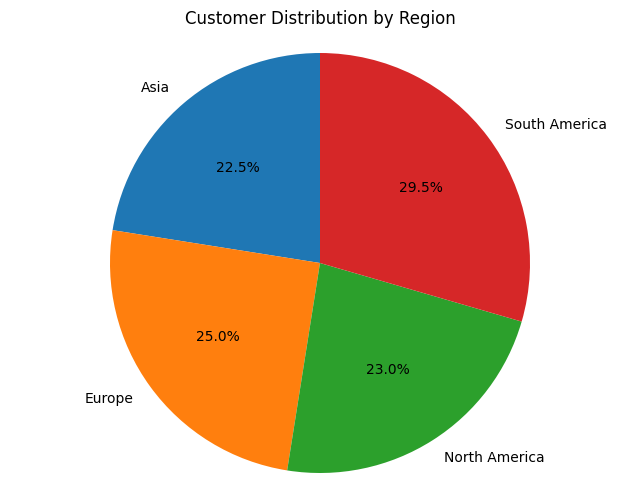

In [ ]:
#Pie chart
plt.figure(figsize=(8, 6))
plt.pie(customer_distribution['CustomerCount'], labels=customer_distribution['Region'], autopct='%1.1f%%', startangle=90)
plt.title("Customer Distribution by Region")
plt.axis('equal')
plt.show()

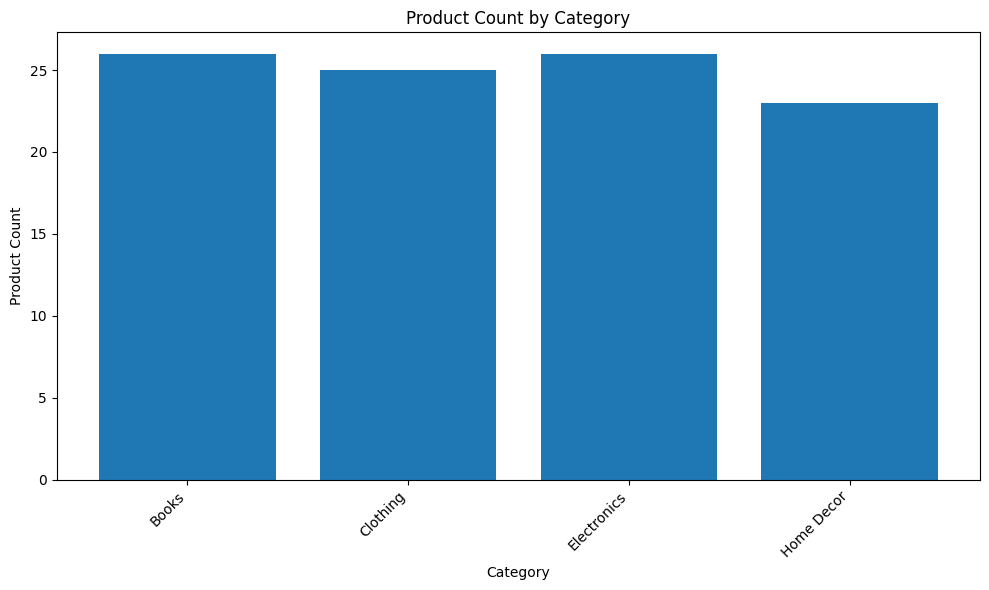

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


product_counts = df2.groupby('Category')['ProductID'].count().reset_index()


product_counts.columns = ['Category', 'ProductCount']


plt.figure(figsize=(10, 6))
plt.bar(product_counts['Category'], product_counts['ProductCount'])
plt.xlabel("Category")
plt.ylabel("Product Count")
plt.title("Product Count by Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

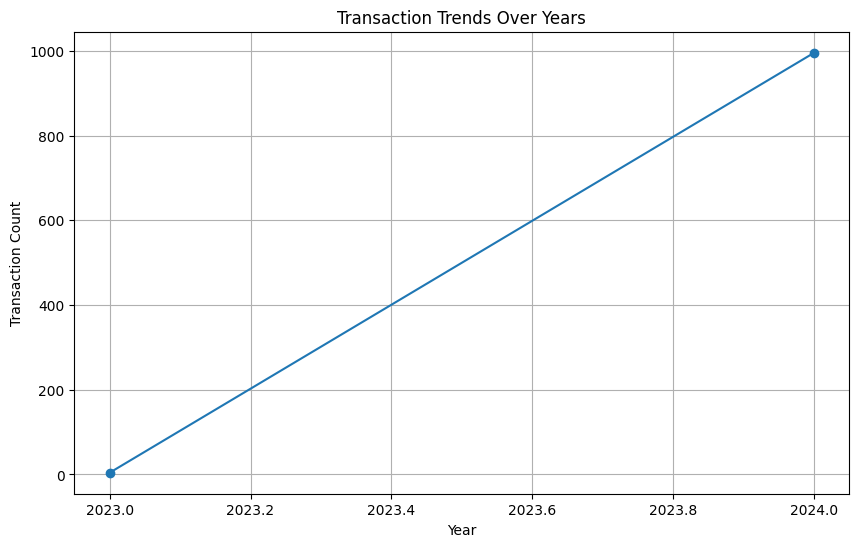

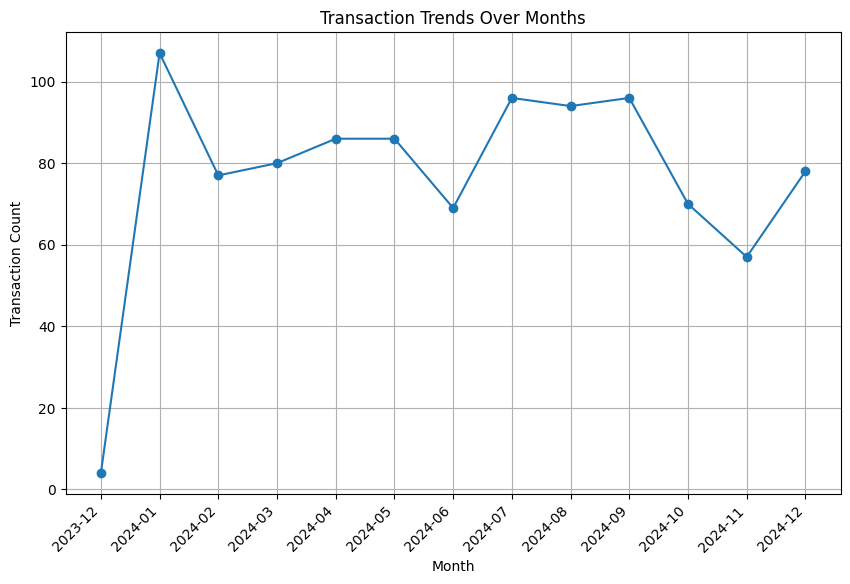

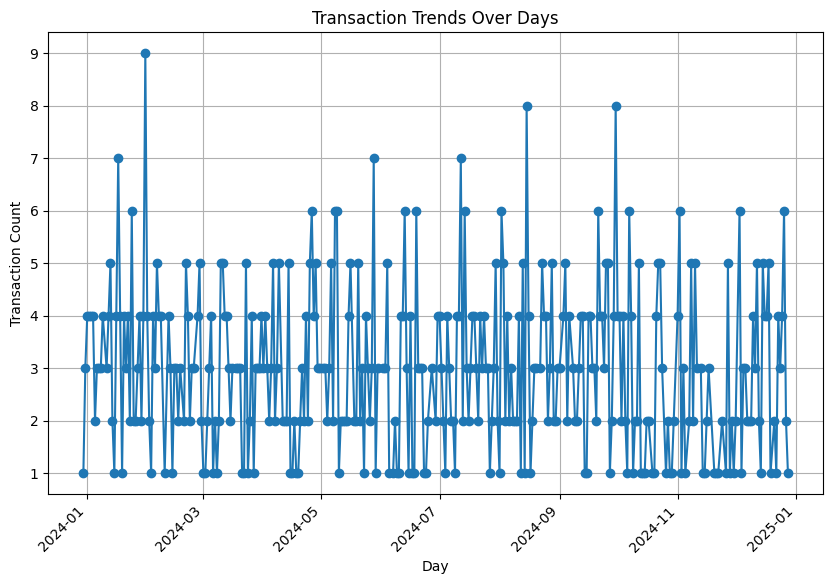

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df3['TransactionDate'] = pd.to_datetime(df3['TransactionDate'])

transactions_by_year = df3.groupby(df3['TransactionDate'].dt.year)['TransactionID'].count().reset_index()
transactions_by_year.columns = ['Year', 'TransactionCount']

transactions_by_month = df3.groupby(df3['TransactionDate'].dt.to_period('M'))['TransactionID'].count().reset_index()
transactions_by_month.columns = ['Month', 'TransactionCount']


transactions_by_day = df3.groupby(df3['TransactionDate'].dt.date)['TransactionID'].count().reset_index()
transactions_by_day.columns = ['Day', 'TransactionCount']


plt.figure(figsize=(10, 6))
plt.plot(transactions_by_year['Year'], transactions_by_year['TransactionCount'], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Transaction Count")
plt.title("Transaction Trends Over Years")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(transactions_by_month['Month'].astype(str), transactions_by_month['TransactionCount'], marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.title("Transaction Trends Over Months")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(transactions_by_day['Day'], transactions_by_day['TransactionCount'], marker='o', linestyle='-')
plt.xlabel("Day")
plt.ylabel("Transaction Count")
plt.title("Transaction Trends Over Days")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()